In [124]:
%%bash

pip3 install pandas numpy matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━��━━━━━━ 294.9/294.9 KB 10.2 MB/s eta 0:00:00


In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
def compare_resource_usage(query, run, fname):
    memory_q1_opt = pd.read_csv(f'{query}/opt/resource-usage-{run}.csv')
    memory_q1_ref = pd.read_csv(f'{query}/ref/resource-usage-{run}.csv')
    
    plt.plot(memory_q1_ref['memory_used'] / (1000 * 1000 * 1000))
    plt.plot(memory_q1_opt['memory_used'] / (1000 * 1000 * 1000))
    plt.savefig(f'memory-{fname}.eps')
    plt.show()

    plt.plot(memory_q1_ref['cpu_used'])
    plt.plot(memory_q1_opt['cpu_used'])
    plt.show()

    N = 15
    plt.plot(np.convolve(memory_q1_ref['cpu_used'], np.ones(N)/N, mode='valid'))
    plt.plot(np.convolve(memory_q1_opt['cpu_used'], np.ones(N)/N, mode='valid'))
    plt.savefig(f'cpu15s-{fname}.eps')
    plt.show()

In [ ]:
compare_resource_usage('benchmark-results-lsqb/q1.sql', '05', 'q1-sf100')

#compare_resource_usage('benchmark-results-lsqb-sf100/q4.sql')

In [100]:
def gen_stats(resdir, ignore_first = True, results='opt'):
    df_opt = pd.read_csv(f'{resdir}/results-{results}.csv')
    if ignore_first:
        df_opt = df_opt[df_opt['run'] != 1]
    df_opt = df_opt.groupby(['query', 'physical_cj']).agg({'runtime': ['mean', 'std']})
    df_opt.to_csv(f'{resdir}/results-{results}-mean.csv')
    return df_opt
def gen_stats_ref(resdir):
    stats_opt_df = pd.read_csv(f'{resdir}/results-ref.csv')
    df_opt = stats_opt_df[stats_opt_df['run'] != 1]
    df_opt = df_opt.groupby(['query']).agg({'runtime': ['mean', 'std']})
    df_opt.to_csv(f'{resdir}/results-ref-mean.csv')
    return df_opt
def gen_stats_imdb(resdir):
    stats_opt_df = pd.read_csv(f'{resdir}/results-opt.csv')
    df_opt = stats_opt_df[stats_opt_df['run'] != 1]
    df_opt['query'] = df_opt['query'].replace(r'[a-z].sql', '.sql', regex=True)
    df_opt = df_opt.groupby(['query']).agg({'runtime': ['mean', 'std', 'sum']})
    df_opt.to_csv(f'{resdir}/results-opt-mean.csv')
    return df_opt

In [101]:
df_opt = gen_stats('benchmark-results-stats')
df_opt.sum()

FileNotFoundError: [Errno 2] No such file or directory: 'benchmark-results-stats/results-opt.csv'

In [102]:
df_opt = gen_stats('benchmark-results-stats-hint')
df_opt.sum()

FileNotFoundError: [Errno 2] No such file or directory: 'benchmark-results-stats-hint/results-opt.csv'

In [20]:
pd.set_option('display.max_rows', None)

In [110]:
df_opt = gen_stats('benchmark-results-imdb', ignore_first = True)
#df_opt['query'] = df_opt['query'].replace(r'\d\\.sql', '.sql', regex=True)
df_opt['runtime_mean'] = df_opt[('runtime', 'mean')]
df_opt['runtime_std'] = df_opt[('runtime', 'std')]
df_opt

runtime             runtime_mean  \
                                       mean         std                
query               physical_cj                                        
10a-unguarded-2.sql True           8.499890    2.358651     8.499890   
10a-unguarded-3.sql True           7.554531    3.268043     7.554531   
10a-unguarded-4.sql True           6.953990    3.296905     6.953990   
10a-unguarded-5.sql True           6.527050    1.894192     6.527050   
11a-unguarded-2.sql True           4.939975    0.263837     4.939975   
11a-unguarded-3.sql True           5.046792    0.479426     5.046792   
11a-unguarded-4.sql True           5.811847    2.238842     5.811847   
11a-unguarded-5.sql True           5.573824    0.422886     5.573824   
11a-unguarded-6.sql True           5.788349    0.361481     5.788349   
11a-unguarded-7.sql True           7.683435    1.953611     7.683435   
12a-unguarded-2.sql True          26.307620    1.659814    26.307620   
12a-unguarded-3.sql True          25.700165    0.977106    25.700165   
12a-unguarded-4.sql True          26.023273    2.957356    26.023273   
12a-unguarded-5.sql True          26.877259    0.963505    26.877259   
12a-unguarded-6.sql True          25.998092    1.364716    25.998092   
12a-unguarded-7.sql True          26.964306    1.600364    26.964306   
13a-unguarded-2.sql True          32.747186    0.975306    32.747186   
13a-unguarded-3.sql True          32.015971    0.590458    32.015971   
13a-unguarded-4.sql True          28.913658    1.532635    28.913658   
13a-unguarded-5.sql True          33.005951    1.802760    33.005951   
13a-unguarded-6.sql True          36.417170    1.335187    36.417170   
13a-unguarded-7.sql True          44.992516   10.711674    44.992516   
13a-unguarded-8.sql True          32.187230    1.383027    32.187230   
14a-unguarded-2.sql True           7.618591    0.237168     7.618591   
14a-unguarded-3.sql True           7.687188    0.445596     7.687188   
14a-unguarded-4.sql True           7.223346    0.245147     7.223346   
14a-unguarded-5.sql True           8.201373    0.232086     8.201373   
14a-unguarded-6.sql True           8.366011    0.241758     8.366011   
14a-unguarded-7.sql True           8.938541    0.534033     8.938541   
15a-unguarded-2.sql True           6.099414    0.608357     6.099414   
15a-unguarded-3.sql True           5.681145    0.877413     5.681145   
15a-unguarded-4.sql True           6.259144    1.004959     6.259144   
15a-unguarded-5.sql True           6.565350    0.220414     6.565350   
15a-unguarded-6.sql True           6.287027    0.776100     6.287027   
15a-unguarded-7.sql True           6.929420    2.160890     6.929420   
15a-unguarded-8.sql True           7.356766    1.494305     7.356766   
16a-unguarded-2.sql True          41.245264    5.718933    41.245264   
16a-unguarded-3.sql True          38.392946    5.064751    38.392946   
16a-unguarded-4.sql True          43.760648    2.708326    43.760648   
16a-unguarded-5.sql True          66.241843   14.870250    66.241843   
16a-unguarded-6.sql True          65.845285    4.001503    65.845285   
16a-unguarded-7.sql True         168.181793  165.766052   168.181793   
17a-unguarded-2.sql True          37.083416    2.279117    37.083416   
17a-unguarded-3.sql True          40.471819    5.299720    40.471819   
17a-unguarded-4.sql True          39.070998    3.771654    39.070998   
17a-unguarded-5.sql True          37.329231    3.474980    37.329231   
18a-unguarded-2.sql True          30.191514    0.265175    30.191514   
18a-unguarded-3.sql True          29.266151    2.022317    29.266151   
18a-unguarded-4.sql True          30.875646    1.878977    30.875646   
18a-unguarded-5.sql True          30.816251    3.025436    30.816251   
19a-unguarded-2.sql True          20.752551    0.880131    20.752551   
19a-unguarded-3.sql True          20.878706    0.913709    20.878706   
19a-unguarded-4.sql True          21.743688    0.767350    21.743688   
19a-

In [109]:
df_ref = gen_stats('benchmark-results-imdb', results='ref', ignore_first = True)
df_ref['runtime_mean'] = df_ref[('runtime', 'mean')]
df_ref['runtime_std'] = df_ref[('runtime', 'std')]
df_ref

runtime           runtime_mean runtime_std
                                       mean       std                         
query               physical_cj                                               
10a-unguarded-2.sql False          6.780839  0.348137     6.780839    0.348137
10a-unguarded-3.sql False          6.281662  0.291320     6.281662    0.291320
10a-unguarded-4.sql False          5.530057  0.633683     5.530057    0.633683
10a-unguarded-5.sql False          6.254320  0.530601     6.254320    0.530601
11a-unguarded-2.sql False          6.082521  0.294171     6.082521    0.294171
11a-unguarded-3.sql False          5.727549  0.199786     5.727549    0.199786
11a-unguarded-4.sql False          5.891374  0.227729     5.891374    0.227729
11a-unguarded-5.sql False          6.428793  0.157480     6.428793    0.157480
11a-unguarded-6.sql False          6.353167  0.094461     6.353167    0.094461
11a-unguarded-7.sql False          6.502456  0.330432     6.502456    0.330432
12a-unguarded-2.sql False         29.835946  1.079699    29.835946    1.079699
12a-unguarded-3.sql False         27.677644  0.504234    27.677644    0.504234
12a-unguarded-4.sql False         27.522703  1.286913    27.522703    1.286913
12a-unguarded-5.sql False         29.853281  0.833945    29.853281    0.833945
12a-unguarded-6.sql False         27.551535  0.621775    27.551535    0.621775
12a-unguarded-7.sql False         32.223408  1.540789    32.223408    1.540789
13a-unguarded-2.sql False         35.980019  0.942146    35.980019    0.942146
13a-unguarded-3.sql False         34.583629  0.544480    34.583629    0.544480
13a-unguarded-4.sql False         32.271880  0.930101    32.271880    0.930101
13a-unguarded-5.sql False         35.487736  0.609699    35.487736    0.609699
13a-unguarded-6.sql False         32.489211  1.114218    32.489211    1.114218
13a-unguarded-7.sql False         36.402503  1.232008    36.402503    1.232008
13a-unguarded-8.sql False         37.054338  1.415276    37.054338    1.415276
14a-unguarded-2.sql False          9.581717  0.332294     9.581717    0.332294
14a-unguarded-3.sql False          9.459919  0.378778     9.459919    0.378778
14a-unguarded-4.sql False          9.480227  0.720536     9.480227    0.720536
14a-unguarded-5.sql False         10.105164  0.365023    10.105164    0.365023
14a-unguarded-6.sql False          9.575801  0.236784     9.575801    0.236784
14a-unguarded-7.sql False         10.567170  0.573361    10.567170    0.573361
15a-unguarded-2.sql False          5.541969  0.388447     5.541969    0.388447
15a-unguarded-3.sql False          5.538332  0.295321     5.538332    0.295321
15a-unguarded-4.sql False          5.320587  0.617018     5.320587    0.617018
15a-unguarded-5.sql False          5.406317  0.481464     5.406317    0.481464
15a-unguarded-6.sql False          5.423825  0.151748     5.423825    0.151748
15a-unguarded-7.sql False          5.318854  0.540025     5.318854    0.540025
15a-unguarded-8.sql False          6.406721  0.762039     6.406721    0.762039
16a-unguarded-2.sql False         90.658153  1.267098    90.658153    1.267098
16a-unguarded-3.sql False         95.311644  0.577469    95.311644    0.577469
16a-unguarded-4.sql False        100.123937  1.998628   100.123937    1.998628
16a-unguarded-5.sql False        109.513939  1.208962   109.513939    1.208962
16a-unguarded-6.sql False        112.313006  1.642084   112.313006    1.642084
16a-unguarded-7.sql False        113.603768  1.153157   113.603768    1.153157
17a-unguarded-2.sql False         79.848620  1.091057    79.848620    1.091057
17a-unguarded-3.sql False         90.770349  1.111692    90.770349    1.111692
17a-unguarded-4.sql False         80.430101  1.043422    80.430101    1.043422
17a-unguarded-5.sql False         86.865255  1.683692    86.865255    1.683692
18a-unguarded-2.sql False         39.452229  1.509607    39.452229    1.509607
18a-unguarded-3.sql False         38.881021  1.898960    38.881021    1.898960
18a-ung

In [111]:
df_compare = df_ref.merge(df_opt, on = 'query', suffixes=('_ref', '_opt'))
df_compare['speedup'] = df_compare[('runtime_ref', 'mean')] / df_compare[('runtime_opt', 'mean')]
df_compare = df_compare.reset_index()

In [129]:
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")
#cmap = sns.light_palette("Navy", as_cmap=True)

<Axes: >

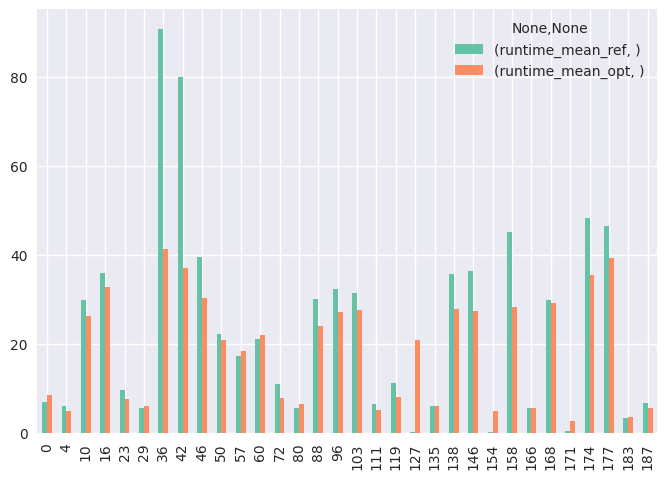

In [130]:
df_compare_2 = df_compare[df_compare['query'].str.contains('unguarded-2.sql')]

df_compare_2[['query', 'runtime_mean_ref', 'runtime_mean_opt']].plot(kind='bar')

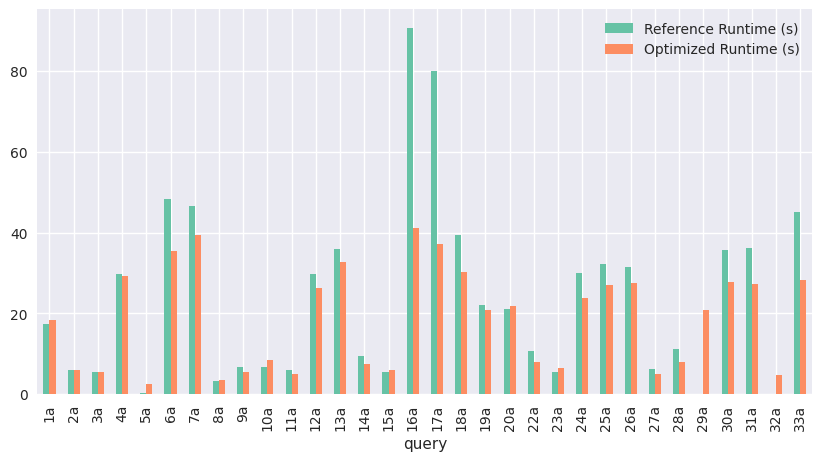

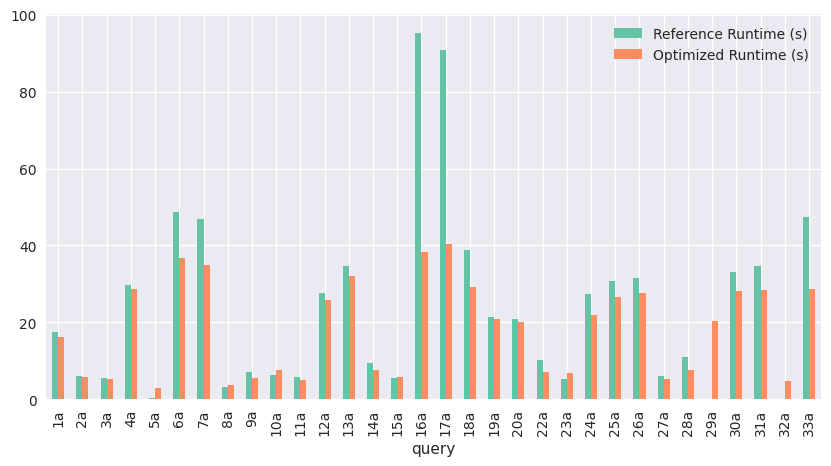

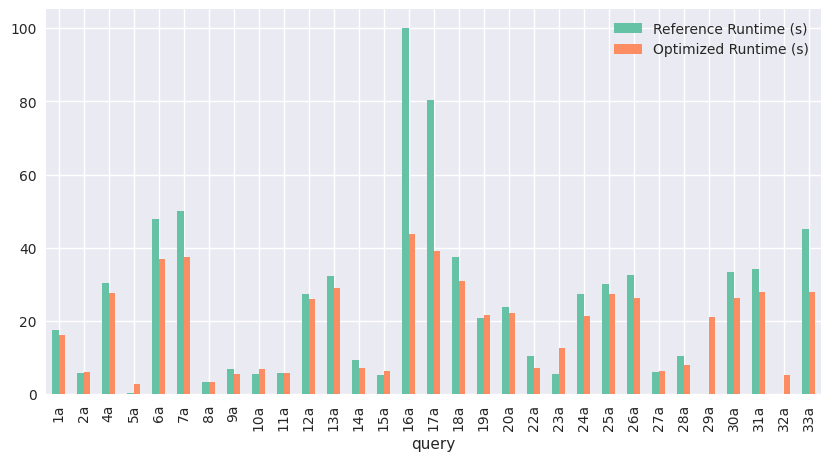

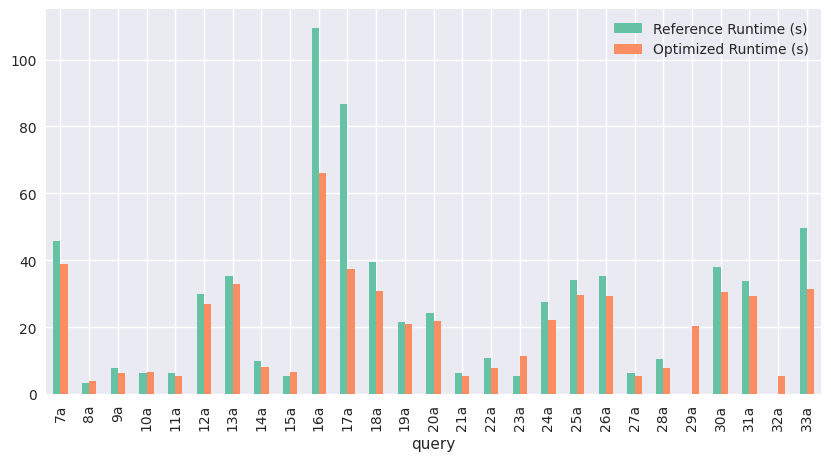

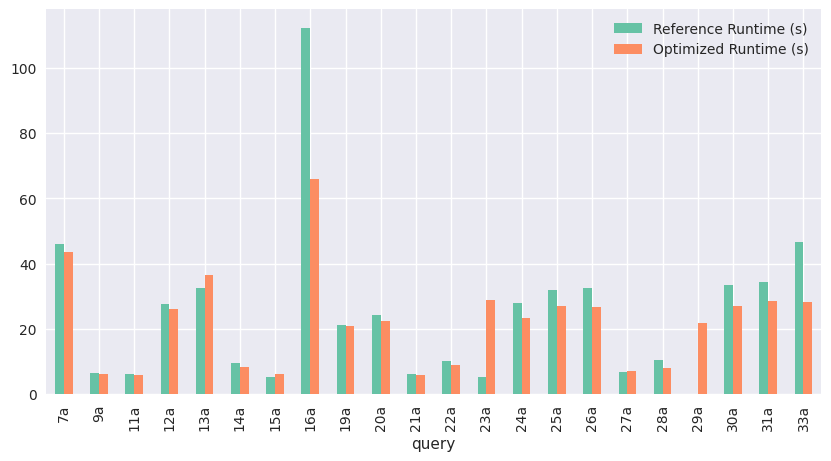

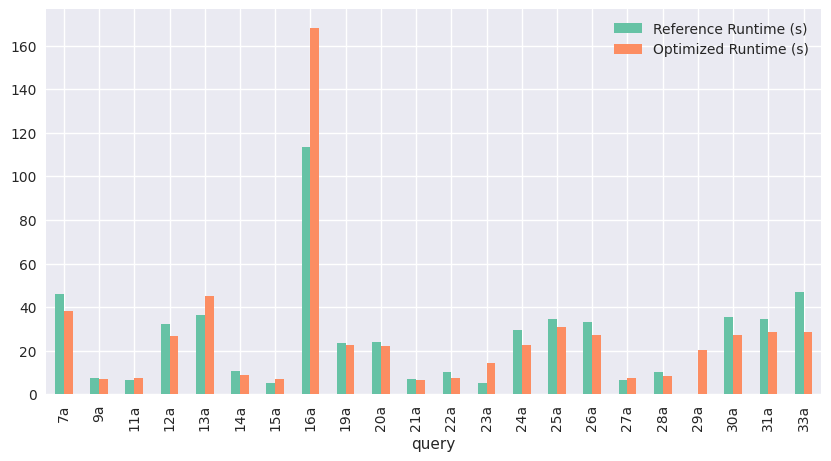

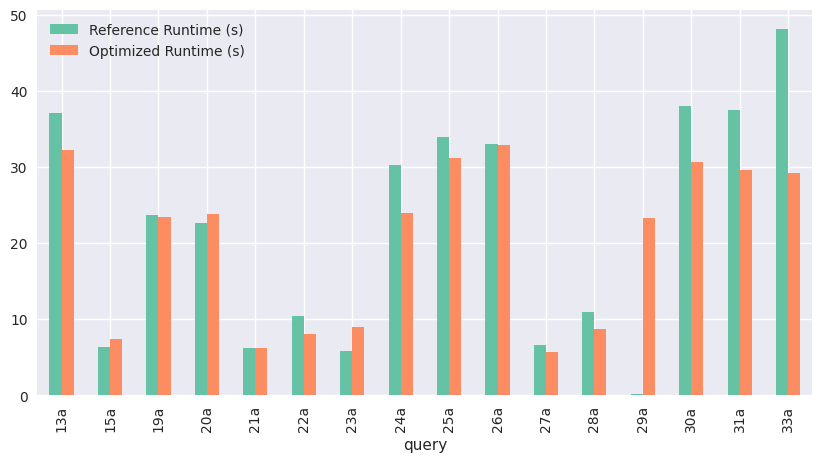

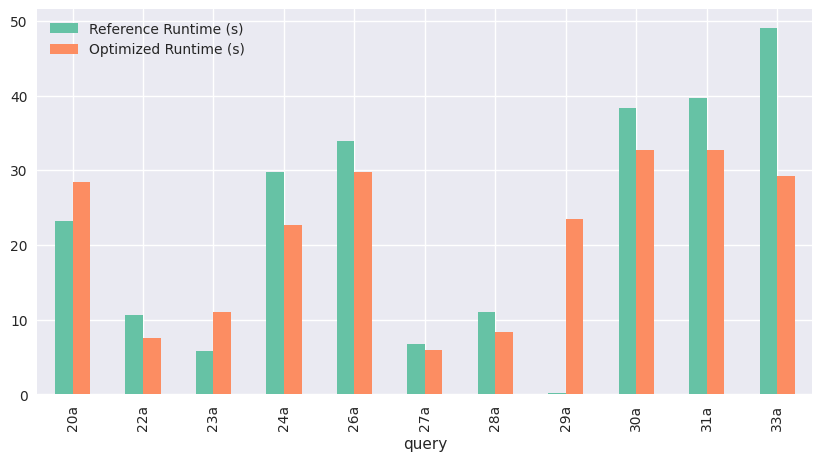

In [158]:
for i in range(2,10):
    df_comp = df_compare[df_compare['query'].str.contains(f'unguarded-{i}.sql')]
    df_comp.loc[:,'query'] = df_comp['query'].apply(lambda x: x.split("-")[0])
    df_comp = df_comp.set_index('query')
    df_comp = df_comp.sort_index(key=lambda x: pd.to_numeric(x.str.rstrip('a')))
    # ax1 = df_comp[['runtime_mean_ref']].plot(kind='bar', figsize=(10,5))
    # ax2 = ax1.twinx()
    # ax2.plot(df_comp['runtime_mean_opt'], kind='bar)
    ax = df_comp[['runtime_mean_ref', 'runtime_mean_opt']].plot(kind='bar', figsize=(10,5))
    ax.legend(['Reference Runtime (s)', 'Optimized Runtime (s)'])
    plt.savefig(f'unguarded-{i}.pdf')

In [108]:
df_compare = df_compare.reset_index()
#df_compare[df_compare['query'].str.contains('unguarded-2.sql')]

for i in range(2,10):
    df_comp = df_compare[df_compare['query'].str.contains(f'unguarded-{i}.sql')]
    sum_df = df_comp.sum()
    ref_mean = sum_df[('runtime_ref', 'mean')]
    opt_mean = sum_df[('runtime_opt', 'mean')]
    print(f'{i} unguarded attributes')
    print(f'ref: {ref_mean}, opt: {opt_mean}, speedup: {ref_mean / opt_mean}')
    #print(df_comp.sum())

2 unguarded attributes
ref: 755.7144412517548, opt: 597.7795653820039, speedup: 1.2642025338701977
3 unguarded attributes
ref: 759.5988554954529, opt: 586.3119648456574, speedup: 1.295554075372506
4 unguarded attributes
ref: 746.8367891311646, opt: 593.5791237354279, speedup: 1.2581924789256018
5 unguarded attributes
ref: 690.6072134971619, opt: 550.3954506874084, speedup: 1.254747314198615
6 unguarded attributes
ref: 537.9341547012328, opt: 484.2065980911255, speedup: 1.1109599844816573
7 unguarded attributes
ref: 559.5016694545747, opt: 583.7218399524689, speedup: 0.9585073422987455
8 unguarded attributes
ref: 351.09567346572874, opt: 325.41327433586116, speedup: 1.0789224077668098
9 unguarded attributes
ref: 248.17474284172056, opt: 232.06149320602418, speedup: 1.0694352579270487


In [45]:
df_opt = df_opt.reset_index()

df_opt[df_opt['query'].str.contains('unguarded-2.sql')]

query physical_cj    runtime                      
                                           mean       std         sum
0    10a-unguarded-2.sql        True   8.499890  2.358651   42.499451
4    11a-unguarded-2.sql        True   4.939975  0.263837   24.699873
10   12a-unguarded-2.sql        True  26.307620  1.659814  131.538099
16   13a-unguarded-2.sql        True  32.747186  0.975306  163.735932
23   14a-unguarded-2.sql        True   7.618591  0.237168   38.092955
29   15a-unguarded-2.sql        True   6.099414  0.608357   30.497072
36   16a-unguarded-2.sql        True  41.245264  5.718933  206.226322
42   17a-unguarded-2.sql        True  37.083416  2.279117  185.417082
46   18a-unguarded-2.sql        True  30.191514  0.265175  150.957569
50   19a-unguarded-2.sql        True  20.752551  0.880131  103.762757
57    1a-unguarded-2.sql        True  18.265087  1.907124   91.325434
60   20a-unguarded-2.sql        True  21.887010  3.883347  109.435048
71   22a-unguarded-2.sql        True   7.880538  0.543053   39.402689
78   23a-unguarded-2.sql        True   6.543262  0.571580   32.716309
85   24a-unguarded-2.sql        True  23.874767  0.899275  119.373834
92   25a-unguarded-2.sql        True  27.040856  2.002752  135.204280
99   26a-unguarded-2.sql        True  27.501959  1.623533  137.509794
106  27a-unguarded-2.sql        True   5.089328  0.341162   25.446641
113  28a-unguarded-2.sql        True   8.076929  0.392295   40.384645
120  29a-unguarded-2.sql        True  20.859073  0.707655  104.295364
127   2a-unguarded-2.sql        True   6.101338  0.201554   30.506688
130  30a-unguarded-2.sql        True  27.783619  1.267351  138.918094
137  31a-unguarded-2.sql        True  27.241467  2.487784  136.207334
144  32a-unguarded-2.sql        True   4.765726  0.194507   23.828631
148  33a-unguarded-2.sql        True  28.342330  0.703586  141.711649
155   3a-unguarded-2.sql        True   5.474073  0.312404   27.370364
157   4a-unguarded-2.sql        True  29.191253  1.238872  145.956266
160   5a-unguarded-2.sql        True   2.671803  0.137888   13.359015
163   6a-unguarded-2.sql        True  35.420876  3.424026  177.104382
166   7a-unguarded-2.sql        True  39.364042  2.548508  196.820208
172   8a-unguarded-2.sql        True   3.457800  0.327765   17.288999
176   9a-unguarded-2.sql        True   5.461009  1.739048   27.305047

In [10]:
df_opt = gen_stats('benchmark-results-lsqb')
df_opt

FileNotFoundError: [Errno 2] No such file or directory: 'benchmark-results-lsqb/results-opt.csv'

In [123]:
df_opt = gen_stats('benchmark-results-lsqb', results='ref', ignore_first=False)
df_opt.round(decimals=2)

runtime                 
                       mean     std      sum
query  physical_cj                          
q1.sql False        3095.81  232.44  6191.62

In [78]:
df_ref = gen_stats_ref('benchmark-results-lsqb')
df_ref

runtime                        
            mean        std          sum
query                                   
q4.sql  602.2586  37.050436  3011.293002

In [86]:
df_opt = gen_stats('benchmark-results-tpch-sf100')
df_opt.round(decimals=2)

runtime              
                                 mean   std     sum
query             physical_cj                      
11-hint.sql       False        164.58  5.90  822.88
                  True         166.96  4.60  834.82
11.sql            False        162.79  3.84  813.94
                  True         167.86  5.79  839.30
2.sql             True          81.54  2.66  407.68
median-1-hint.sql False         50.74  1.90  253.71
                  True          49.67  1.15  248.37
median-1.sql      False         50.04  1.34  250.18
                  True          51.56  0.89  257.78

In [116]:
df_opt = gen_stats('benchmark-results-tpch')
df_opt.round(decimals=2)

runtime                
                                 mean    std      sum
query             physical_cj                        
11-hint.sql       False        346.31   9.74  1731.57
                  True         344.01  10.95  1720.04
11.sql            False        334.92   8.20  1674.62
                  True         329.42   5.92  1647.09
2.sql             False        164.21   4.74   821.07
                  True         160.64   3.74   803.22
median-1-hint.sql False        106.18   1.12   530.92
                  True         102.04   3.88   510.18
median-1.sql      False        107.51   8.90   537.53
                  True         105.11   3.86   525.53

In [111]:
df_opt = gen_stats('benchmark-results-tpch', results='ref')
df_opt.round(decimals=2)

runtime                
                                 mean    std      sum
query             physical_cj                        
11-hint.sql       False        351.76  14.56  1758.79
11.sql            False        351.14  11.91  1755.69
2.sql             False        179.43   6.50   897.17
median-1-hint.sql False        165.93   2.50   829.66
median-1.sql      False        168.44   4.41   842.21

In [51]:
df_opt = gen_stats('benchmark-results-tpch-part1')
df_opt

runtime                      
                         mean       std         sum
query                                              
11-hint.sql        189.647959  3.507685  948.239795
11.sql                    NaN       NaN    0.000000
2.sql               79.777111  3.000262  398.885554
median-1-hint.sql   52.460698  1.423260  262.303489
median-1.sql        91.899140  2.280504  459.495702

In [55]:
df_opt = gen_stats('benchmark-results-snap')
df_opt.round(decimals=2)

runtime              
                      mean   std     sum
query                                   
dblp-path02.sql       1.31  0.18    6.55
dblp-path03.sql       1.59  0.12    7.97
dblp-path04.sql       1.76  0.16    8.82
dblp-path05.sql       2.03  0.25   10.16
dblp-path06.sql       2.18  0.14   10.92
dblp-path07.sql       2.38  0.26   11.92
dblp-path08.sql       2.53  0.30   12.64
dblp-tree01.sql       1.47  0.28    7.37
dblp-tree02.sql       1.69  0.16    8.46
dblp-tree03.sql       1.99  0.16    9.93
google-path02.sql     5.10  0.52   25.48
google-path03.sql     6.08  0.65   30.39
google-path04.sql     6.89  0.30   34.46
google-path05.sql     7.53  0.48   37.67
google-path06.sql     8.80  0.25   43.98
google-path07.sql     9.76  1.21   48.80
google-path08.sql    10.05  1.49   50.26
google-tree01.sql     6.53  1.11   32.65
google-tree02.sql     7.29  0.73   36.44
google-tree03.sql     8.16  0.66   40.82
patents-path02.sql   12.03  0.70   60.14
patents-path03.sql   13.01  0.58   65.06
patents-path04.sql   14.36  0.59   71.82
patents-path05.sql   15.32  1.09   76.58
patents-path06.sql   15.97  1.15   79.85
patents-path07.sql   17.66  0.56   88.32
patents-path08.sql   18.47  1.20   92.35
patents-tree01.sql   14.01  0.75   70.06
patents-tree02.sql   14.38  1.19   71.89
patents-tree03.sql   16.07  1.32   80.35
wiki-path02.sql      21.38  0.68  106.91
wiki-path03.sql      23.71  0.54  118.56
wiki-path04.sql      25.94  1.12  129.70
wiki-path05.sql      27.46  0.64  137.32
wiki-path06.sql      30.16  1.00  150.80
wiki-path07.sql      33.32  1.62  166.61
wiki-path08.sql      34.49  0.68  172.43
wiki-tree01.sql      25.44  0.43  127.20
wiki-tree02.sql      27.64  0.57  138.19
wiki-tree03.sql      30.70  1.01  153.49

In [148]:
pd.set_option('display.max_rows', 500)
df = gen_stats('benchmark-results-hetio', ignore_first=False)
df.round(decimals=2)

runtime             
                                   mean   std    sum
query               physical_cj                     
2-01-CbGaD.sql      False          0.51   NaN   0.51
                    True           0.39  0.02   1.17
2-02-CdGuD.sql      False          0.80   NaN   0.80
                    True           0.66  0.08   1.98
2-03-CrCtD.sql      False          0.32   NaN   0.32
                    True           0.29  0.03   0.88
2-04-CtDrD.sql      False          0.33   NaN   0.33
                    True           0.23  0.02   0.70
2-05-CuGdD.sql      False          0.85   NaN   0.85
                    True           0.62  0.06   1.85
3-01-CbGbCtD.sql    False          0.54   NaN   0.54
                    True           0.47  0.05   1.41
3-02-CbGeAlD.sql    False          2.34   NaN   2.34
                    True           1.51  0.10   3.02
3-03-CbGiGaD.sql    False          1.50   NaN   1.50
                    True           0.93   NaN   0.93
3-04-CcSEcCtD.sql   False          1.16   NaN   1.16
                    True           0.90   NaN   0.90
3-05-CdGdCtD.sql    False          1.06   NaN   1.06
                    True           0.70   NaN   0.70
3-06-CdGuCtD.sql    False          0.79   NaN   0.79
                    True           0.65   NaN   0.65
3-07-CiPCiCtD.sql   False          2.92   NaN   2.92
                    True           4.84   NaN   4.84
3-08-CpDpCtD.sql    False          0.33   NaN   0.33
                    True           0.35   NaN   0.35
3-09-CrCrCtD.sql    False          0.39   NaN   0.39
                    True           0.38   NaN   0.38
3-10-CrCbGaD.sql    False          0.41   NaN   0.41
                    True           0.51   NaN   0.51
3-11-CtDdGdD.sql    False          1.02   NaN   1.02
                    True           0.60   NaN   0.60
3-12-CtDdGuD.sql    False          0.78   NaN   0.78
                    True           0.56   NaN   0.56
3-13-CtDlAlD.sql    False          0.33   NaN   0.33
                    True           0.31   NaN   0.31
3-14-CtDpSpD.sql    False          0.50   NaN   0.50
                    True           0.30   NaN   0.30
3-15-CtDuGdD.sql    False          0.94   NaN   0.94
                    True           0.74   NaN   0.74
3-16-CtDuGuD.sql    False          0.89   NaN   0.89
                    True           0.68   NaN   0.68
3-17-CuGdCtD.sql    False          0.80   NaN   0.80
                    True           0.71   NaN   0.71
3-18-CuGuCtD.sql    False          0.76   NaN   0.76
                    True           0.64   NaN   0.64
4-01-CbGiGiGaD.sql  False          1.28   NaN   1.28
                    True           1.35   NaN   1.35
4-02-CbGpBPpGaD.sql False          3.95   NaN   3.95
                    True           4.29   NaN   4.29
4-03-CbGpPWpGaD.sql False          3.86   NaN   3.86
                    True           2.44   NaN   2.44
CbGiGiGaD.sql       False          1.40  0.17   7.00
                    True           1.35  0.22   6.77
CbGpBPpGaD.sql      False          3.83  0.31  30.64
                    True           3.43  0.54  27.46
CbGpPWpGaD.sql      False          3.02  0.35  24.13
                    True           2.71  0.30  21.65
CtDpSpD.sql         False          0.42  0.07   1.27
                    True           0.35  0.05   1.06
CtDuGdD.sql         False          0.85  0.16   2.56
                    True           0.62  0.03   1.86
CtDuGuD.sql         False          0.86  0.09   2.58
                    True           0.61  0.06   1.83
CuGdCtD.sql         False          0.77  0.22   2.32
                    True           0.64  0.07   1.91
CuGuCtD.sql         False          1.01  0.06   3.04
                    True           0.66  0.10   1.98
q1.sql              False          3.36  0.49  20.16
                    True           2.78  0.43  16.70

In [149]:
df = gen_stats('benchmark-results-hetio', results='ref', ignore_first=False)
df.round(decimals=2)

runtime               
                                   mean    std     sum
query               physical_cj                       
2-01-CbGaD.sql      False          0.36    NaN    0.36
2-02-CdGuD.sql      False          0.66    NaN    0.66
2-03-CrCtD.sql      False          0.21    NaN    0.21
2-04-CtDrD.sql      False          0.18    NaN    0.18
2-05-CuGdD.sql      False          0.57    NaN    0.57
3-01-CbGbCtD.sql    False          0.57    NaN    0.57
3-02-CbGeAlD.sql    False          2.06    NaN    2.06
3-03-CbGiGaD.sql    False          0.53    NaN    0.53
3-04-CcSEcCtD.sql   False         12.21    NaN   12.21
3-05-CdGdCtD.sql    False          1.14    NaN    1.14
3-06-CdGuCtD.sql    False          0.56    NaN    0.56
3-07-CiPCiCtD.sql   False          0.85    NaN    0.85
3-08-CpDpCtD.sql    False          0.25    NaN    0.25
3-09-CrCrCtD.sql    False          0.31    NaN    0.31
3-10-CrCbGaD.sql    False          0.32    NaN    0.32
3-11-CtDdGdD.sql    False          0.79    NaN    0.79
3-12-CtDdGuD.sql    False          0.60    NaN    0.60
3-13-CtDlAlD.sql    False          0.22    NaN    0.22
3-14-CtDpSpD.sql    False          0.23    NaN    0.23
3-15-CtDuGdD.sql    False          0.59    NaN    0.59
3-16-CtDuGuD.sql    False          0.54    NaN    0.54
3-17-CuGdCtD.sql    False          0.49    NaN    0.49
3-18-CuGuCtD.sql    False          0.57    NaN    0.57
4-01-CbGiGiGaD.sql  False         19.01    NaN   19.01
4-02-CbGpBPpGaD.sql False         52.92    NaN   52.92
4-03-CbGpPWpGaD.sql False         11.18    NaN   11.18
CbGiGiGaD.sql       False         16.43   1.64   82.17
CbGpBPpGaD.sql      False         58.57  12.98  468.56
CbGpPWpGaD.sql      False         12.75   1.29  102.01
CtDpSpD.sql         False          0.23   0.01    0.70
CtDuGdD.sql         False          0.65   0.07    1.95
CtDuGuD.sql         False          0.68   0.10    2.04
CuGdCtD.sql         False          0.52   0.03    1.55
CuGuCtD.sql         False          0.85   0.15    2.56
q1.sql              False         12.10   1.64   72.58

In [ ]:
stats_ref_df = pd.read_csv('benchmark-results-stats/results-ref.csv')
df_ref = stats_ref_df[stats_opt_df['run'] != 1]
df_ref = df_ref.groupby(['query']).agg({'runtime': ['mean', 'std', 'sum']})
df_ref.to_csv('benchmark-results-stats/results-ref-mean.csv')

In [ ]:
#df[['query', 'runtime']].plot()
df = df_opt
plt.plot(df[df.index.str.contains('hint.sql')][[('runtime', 'mean')]])
plt.plot(df[~df.index.str.contains('hint.sql')][[('runtime', 'mean')]])
#df.index#['query']

In [ ]:
df_opt[df_opt.index.str.contains('hint.sql')][[('runtime', 'sum')]].sum()

In [ ]:
df_opt[~df_opt.index.str.contains('hint.sql')][[('runtime', 'sum')]].sum()

In [ ]:
df_ref[[('runtime', 'sum')]].sum()

In [ ]:
df = pd.read_csv('benchmark-results-tpch/results-ref.csv')

In [ ]:
print(df)

In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df = pd.read_csv('results-neo4j.csv')
df['runtime'] = df['runtime'] / 1000
df_agg = df.groupby('query').agg({'runtime': ['mean', 'std', 'sum']})
print(df_agg)

               runtime                 
                  mean     std      sum
query                                  
dblp-path03     97.792   0.729  391.168
dblp-path04   1725.101  81.605 6900.406
google-path03 1686.677 114.285 6746.707


In [5]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df = pd.read_csv('results-graphdb.csv')
df['runtime'] = df['runtime'] / 1000
df_agg = df.groupby('query').agg({'runtime': ['mean', 'std', 'sum']})
print(df_agg)

            runtime               
               mean   std      sum
query                             
dblp-path03 322.750 0.957 1291.000
